In [134]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [135]:
data_1 = pd.read_csv('nps_1.csv')
data_2 = pd.read_csv('nps_2.csv')
data_3 = pd.read_csv('nps_3.csv')

In [120]:
data_1 = data_1[data_1.likely<=5]
data_2 = data_2[data_2.likely<=5]
data_3 = data_3[data_3.likely<=5]

In [136]:
tokenize = lambda x: nltk.word_tokenize(str(x).lower())

In [137]:
data_1['tokens_1'] = data_1['likely_reason'].apply(tokenize)
data_1['tokens_2'] = data_1['improvement'].apply(tokenize)

In [138]:
data_2['tokens_1'] = data_2['likely_reason'].apply(tokenize)
data_2['tokens_2'] = data_2['improvement'].apply(tokenize)

In [139]:
data_3['tokens_1'] = data_3['likely_reason'].apply(tokenize)
data_3['tokens_2'] = data_3['improvement'].apply(tokenize)

In [140]:
a = data_1['tokens_2'].values #+ data_1['tokens_1'].values 
b = data_2['tokens_2'].values #+ data_2['tokens_1'].values 
c = data_3['tokens_2'].values #+ data_3['tokens_1'].values 

In [141]:
words_1 = [i.lower() for i in sum(a, [])]
words_2 = [i.lower() for i in sum(b, [])]
words_3 = [i.lower() for i in sum(c, [])]

In [142]:
words = words_1 + words_2 + words_3

In [143]:
stop_words = list(set(stopwords.words('english')))

In [144]:
junkish = []
filtered_words = [word for word in words if word not in junkish+stop_words]

In [145]:
#filtered_words = ['no_'+i for i in filtered_words]

In [148]:
def generate_wordcloud(words):
    text = ' '.join(words)
    text = text.replace('thank', 'thanks')
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=['nan', 'no_nan', 'free'], background_color='black', max_words=2000).generate(text)
    
    # Display the generated image:
    # the matplotlib way: 
    plt.imshow(wordcloud)
    plt.axis("off")

    plt.show()

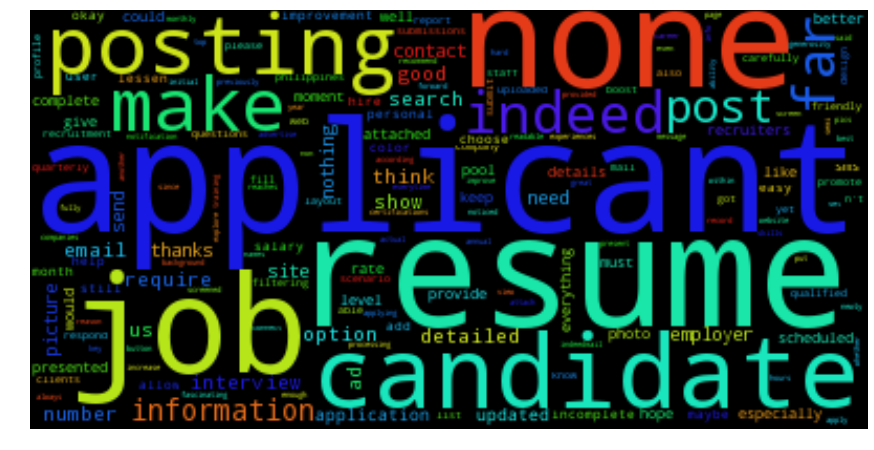

In [149]:
generate_wordcloud(filtered_words)